# Part I:  Encoding

In [1]:
# Packages
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import warnings 
import category_encoders as ce
import math
warnings.filterwarnings('ignore')

In [2]:
# Loading data
np.random.seed(123)

data = pd.read_csv('allegro-api-transactions.csv')
df = pd.DataFrame(data)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 14 columns):
lp                        420020 non-null int64
date                      420020 non-null object
item_id                   420020 non-null int64
categories                420020 non-null object
pay_option_on_delivery    420020 non-null int64
pay_option_transfer       420020 non-null int64
seller                    420020 non-null object
price                     420020 non-null float64
it_is_allegro_standard    420020 non-null int64
it_quantity               420020 non-null int64
it_is_brand_zone          420020 non-null int64
it_seller_rating          420020 non-null int64
it_location               420020 non-null object
main_category             420020 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 44.9+ MB


In [4]:
# The cardinalities of the unique values of attributes check.
df.nunique()

lp                        420020
date                       38953
item_id                   332519
categories                  9020
pay_option_on_delivery         2
pay_option_transfer            2
seller                     51064
price                       9722
it_is_allegro_standard         2
it_quantity                 7305
it_is_brand_zone               2
it_seller_rating           46093
it_location                10056
main_category                 27
dtype: int64

# 1. Target-encoding for it-location variable

### it_location variable

In [5]:
df.it_location.unique()

array(['Warszawa', 'Leszno', 'Wola Krzysztoporska', ..., 'Tarnawa-Góra',
       'Zbytów', 'Dąbrowa k/Poznania'], dtype=object)

In [6]:
# The it_location column has non-standard string that require normalization when training the model,
# for homework purposes, I will limit such activities to a uniform size of letters and getting rid of whitespaces.
df.iloc[:, 12] = df.iloc[:, 12].str.lower()
df.iloc[:, 12] = df.iloc[:, 12].str.strip()
df.iloc[:, 12].nunique() # 

7619

In [7]:
# In the case of regression, the interpretation of target encoding is the assignment of the expected value 
# of the target variable (price) provided a specific class.
# Labels are therefore directly linked to the target variable.

In [8]:
mean_encoding = df.groupby('it_location')['price'].mean()
print(mean_encoding)

it_location
#                                    42.000000
&                                    14.000000
&&&                                  28.400000
&&&&&                               139.000000
(                                    45.000000
                                       ...    
żywiec- bielsko-katowice-gliwice    860.000000
żórawina                             31.934615
żółkiewka                           118.130000
żędowice                             89.434146
↑╔╩═╬╤╤╝←                             2.070000
Name: price, Length: 7619, dtype: float64


In [9]:
df.loc[:, 'price_mean_enc'] = df['it_location'].map(mean_encoding)
df.iloc[0:10, [12, 14]]

,it_location,price_mean_enc
0,warszawa,84.128595
1,warszawa,84.128595
2,leszno,65.180279
3,wola krzysztoporska,35.433365
4,białystok,73.673205
5,gąbin,22.364118
6,gąbin,22.364118
7,legionowo,61.505325
8,zachodniopomorskie,46.491014
9,warszawa,84.128595


* The problem with one-hot encoding is that it greatly increases the dimensionality of the training data (by adding a new feature for each unique category in the original dataset). This often leads to poorer model performance due to the fact, that it is harder for machine learning algorithms to learn from data which has more dimensions. The advantages of the mean encoding are that **it does not affect the volume of data** and helps in faster learning. This can be a very nice way of dealing with a lot of categories.  

* However because these encoders use the target value, you we to be careful when doing cross-validation to encode during each step of cross-validation, rather than just encode. Target Encoding is notorious for over-fitting, so the regularization with cross-validation or some other approach is a must on most occasions.   
In my opinion, if there are only a few examples per category, this technique is not going to be particularly useful. 


# 2. Encoding for main_category variable
### main_category variable

In [10]:
df.main_category.unique()
# For this variable all categories make sense and there's no cleaning need. 

array(['Komputery', 'Odzież, Obuwie, Dodatki', 'Dom i Ogród',
       'Książki i Komiksy', 'Biżuteria i Zegarki', 'RTV i AGD',
       'Motoryzacja', 'Dla Dzieci', 'Uroda', 'Telefony i Akcesoria',
       'Sport i Turystyka', 'Delikatesy', 'Kolekcje', 'Gry', 'Rękodzieło',
       'Zdrowie', 'Przemysł', 'Filmy', 'Fotografia', 'Biuro i Reklama',
       'Instrumenty', 'Muzyka', 'Konsole i automaty',
       'Sprzęt estradowy, studyjny i DJ-ski', 'Antyki i Sztuka', 'Bilety',
       'Nieruchomości'], dtype=object)

In [11]:
df.main_category.nunique()

27

## 2.1. One-hot encoding

In [12]:
# In this method, we map each category to vector that contains 1 and 0 denoting the presence or absence 
# of the feature. The number of vectors depends on the number of categories for features. 
# This allows us to encode the categorical information numerically, without loss of information, 
# but ends up adding a lot of columns when the original categorical feature has many unique categories.
# The values in the dataframe below are mostly 0s because the data we generated has so many categories.  
# One Hot Encoding allows us to find the effect for each level, and generally works pretty well for linear models,
# but because only a small fraction of the data happens to belong to any one level (if there are a lot of levels),
# it is hard for tree-based models to split on them

In [13]:
df_OHE = pd.get_dummies(df, prefix = ["main_category"], columns = ['main_category'])
df_OHE.iloc[0:10, 14:]

,main_category_Antyki i Sztuka,main_category_Bilety,main_category_Biuro i Reklama,main_category_Biżuteria i Zegarki,main_category_Delikatesy,main_category_Dla Dzieci,main_category_Dom i Ogród,main_category_Filmy,main_category_Fotografia,main_category_Gry,...,main_category_Nieruchomości,"main_category_Odzież, Obuwie, Dodatki",main_category_Przemysł,main_category_RTV i AGD,main_category_Rękodzieło,main_category_Sport i Turystyka,"main_category_Sprzęt estradowy, studyjny i DJ-ski",main_category_Telefony i Akcesoria,main_category_Uroda,main_category_Zdrowie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## 2.2. Hash encoding

In [14]:
# This commonly used technique converts string type features into a fixed dimension vector using a hash function. 
# This becomes useful for high cardinality variables where one hot encoding will give huge number of features, 
# particularly if you are using tree-based models. The central part of the hashing encoder is the hash function, 
# which maps the value of a category into a number. The supplied hash functions make it unlikely to get collisions, 
# but it is something to be aware of.

# It is similar to one-hot encoding but with fewer new dimensions and some info loss due to collisions. 
# The collisions do not significantly affect performance unless there is a great deal of overlap.

In [15]:
df.iloc[0:20, 13]

0                   Komputery
1     Odzież, Obuwie, Dodatki
2                 Dom i Ogród
3           Książki i Komiksy
4     Odzież, Obuwie, Dodatki
5     Odzież, Obuwie, Dodatki
6     Odzież, Obuwie, Dodatki
7         Biżuteria i Zegarki
8                   RTV i AGD
9                   RTV i AGD
10        Biżuteria i Zegarki
11                  Komputery
12                Motoryzacja
13                Motoryzacja
14                Motoryzacja
15                  Komputery
16                Dom i Ogród
17    Odzież, Obuwie, Dodatki
18                Dom i Ogród
19                Dom i Ogród
Name: main_category, dtype: object

In [16]:
# The n_components parameter controls the number of expanded columns, by default 8. 

In [17]:
hash_encode = ce.HashingEncoder(n_components= 7, cols=['main_category']) # k == n_components
df_HE = df.iloc[0:20, ]
hash_encode.fit_transform(df_HE).iloc[0:20, 0:7]

,col_0,col_1,col_2,col_3,col_4,col_5,col_6
0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0
5,0,0,0,1,0,0,0
6,0,0,0,1,0,0,0
7,0,0,0,0,0,0,1
8,0,0,0,1,0,0,0
9,0,0,0,1,0,0,0


In [18]:
hash_encode = ce.HashingEncoder(n_components= 3, cols=['main_category']) # k > n_components
hash_encode.fit_transform(df_HE).iloc[0:20, 0:3]
# If you set n_components less than k you’ll have a small reduction in the value provided by the encoded data.
# You’ll also have fewer dimensions.

,col_0,col_1,col_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,1,0
8,0,0,1
9,0,0,1


In [19]:
hash_encode = ce.HashingEncoder(n_components= 9, cols=['main_category']) # k < n_components
hash_encode.fit_transform(df_HE).iloc[0:20, 0:9]
# If column has less k values and k < n_components the default results in (n_components - k) columns full of 0s.

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,1,0,0,0
7,0,1,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0


## 2.3. Helmert Encoding

In [20]:
# It is said that Helmert coding is a third commonly used type of categorical encoding along with OHE 
# and Sum Encoding. 
# In this encoding, the mean of the dependent variable for a level is compared to the mean of depending variables 
# in all previous levels. 

# This type of encoding seems to be useful in certain situations where levels of the categorical variable 
# are ordered, say, from lowest to highest, or from smallest to largest.

In [21]:
helmert_encoder = ce.HelmertEncoder(cols = ['main_category'], drop_invariant=True)
encoded = helmert_encoder.fit_transform(df['main_category'])
df_H = pd.concat([df, encoded], axis = 1)

In [22]:
df_H.iloc[0:10, 15:]

,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5,main_category_6,main_category_7,main_category_8,main_category_9,...,main_category_16,main_category_17,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,0.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,0.0,0.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,0.0,0.0,0.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,0.0,0.0,0.0,0.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9,0.0,0.0,0.0,0.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


# Part II: Multivariative feature imputation


In [23]:
# IterativeImputer class models each feature with missing values as a function of other features, 
# and uses that estimate for imputation. 

In [24]:
# Tools
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error
from math import sqrt
import statistics

Text(0.5, 1, 'Correlation heatmap')

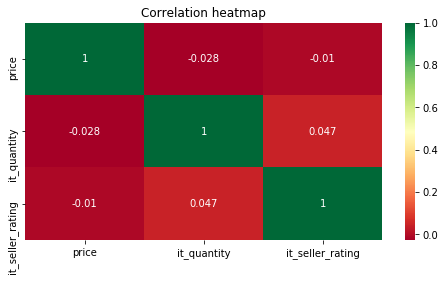

In [25]:
fig, ax = plt.subplots(figsize = (8, 4))
corr=df.iloc[:, [7, 9, 11]].corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True, cmap = 'RdYlGn')
ax.set_title("Correlation heatmap")

In [26]:
# Weakly correlated data, little chance of accurate inference

### 1. Missing data in it_seller_rating column

In [27]:
RMSE1 = []

# limiting the set to numeric variables
df_num = df[['price','it_seller_rating','it_quantity']]

for i in range(10):
    
    df_test1 = df_num.copy()
    
    # removal of 10% of observations from the selected columns
    to_miss = np.random.randint(df_test1.shape[0],size = math.ceil(0.1*df_test1.shape[0]))
    df_test1.it_seller_rating.loc[to_miss] = np.nan
    
    # imputation
    imp = IterativeImputer(max_iter=20)
    impute = pd.DataFrame(imp.fit_transform(df_test1))
    
    # error calc.
    RMSE1.append(mean_squared_error(impute, df_num, squared=False))

In [28]:
# Results 
RMSE1

[6569.465991374537,
 6582.755035855907,
 6593.330365761267,
 6523.248237853331,
 6510.246629096116,
 6636.152733110578,
 6539.597950264159,
 6569.71785725391,
 6413.918597948456,
 6445.970808567712]

In [29]:
# Standard deviation
deviation = statistics.stdev(RMSE1)
deviation

67.94490982777184

### 2. Missing data in it_seller_rating and it_quantity columns

In [30]:
RMSE2 = []

for i in range(10):
    df_test2 = df_num.copy()

    # removal of 10% of observations from the selected columns    
    n = df_test2.shape[0]
    to_miss1 = np.random.randint(n, size=math.ceil(0.1 * n))
    to_miss2 = np.random.randint(n, size=math.ceil(0.1 * n))
    df_test2.it_seller_rating.loc[to_miss1] = np.nan
    df_test2.it_quantity.loc[to_miss2] = np.nan
    
    # imputation
    imp = IterativeImputer(max_iter=20)
    imputed = pd.DataFrame(imp.fit_transform(df_test2))
    
    # error calc.
    RMSE2.append(mean_squared_error(imputed, df_num, squared=False))

In [31]:
# Result 
RMSE2

[7609.938245958983,
 7757.958789633712,
 7710.906004373064,
 7861.534399791587,
 7747.048032927336,
 7760.930240179184,
 7783.611015832371,
 7807.564532265433,
 7834.988403674996,
 7731.422166544365]

In [32]:
# Standard deviation
deviation = statistics.stdev(RMSE2)
deviation

70.44864559773937

### Conclusions

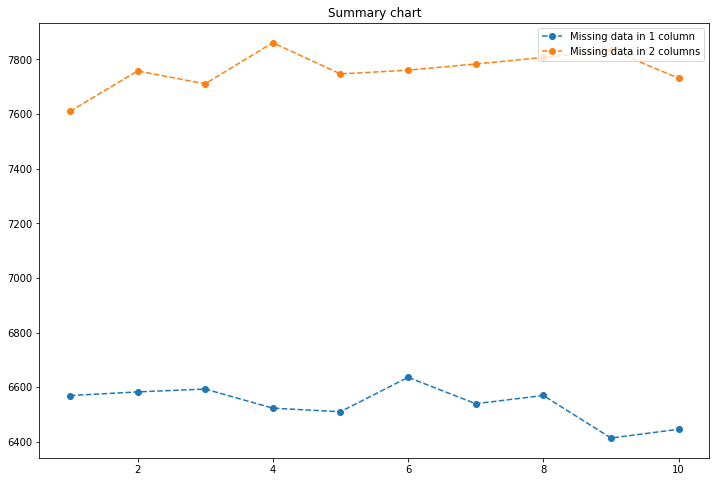

In [33]:
plt.rcParams["figure.figsize"] = (12,8)
x = np.r_[1:11]

fig,ax = plt.subplots()
line1 = ax.plot(x,RMSE1, label='Missing data in 1 column', marker='o', linestyle = '--')
line2 = ax.plot(x,RMSE2, label='Missing data in 2 columns', marker='o', linestyle = '--')
legend = ax.legend(loc='upper right')
plt.title('Summary chart')
plt.show()

According to intuition, the error when data in two columns is partially removed is greater than when deleting in one, however the standard deviation for both cases is comparable. Considering the magnitude of the error and the negligible correlation of variables, it can be stated that in both cases the method worked relatively well.